In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Load Data

In [2]:
# Load
data = pd.read_csv('./csv/rgb/2020/jan/result_50_each_class.csv')

In [3]:
data

,Mean_Blue,Mean_Green,Mean_Red,Label
0,607.703649,694.723373,421.506903,0
1,261.501833,297.435484,172.278959,0
2,533.787037,742.799383,1084.160494,0
3,231.564312,368.199275,202.982790,0
4,302.442982,485.138158,310.421053,0
...,...,...,...,...
245,665.130769,1035.000000,1613.969231,4
246,513.268382,739.727941,1117.419118,4
247,467.561538,693.500000,1074.530769,4
248,369.381481,525.692593,791.653704,4


# Setup data for Training and Testing

In [4]:
X = data[['Mean_Blue', 'Mean_Green', 'Mean_Red']]
y = data['Label']

In [5]:
classifier = SVC(
    C=10,
    kernel='rbf',
    gamma='auto',
)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
classifier.fit(X_train_scaled, y_train)

SVC(C=10, gamma='auto')

# Model Evaluation

In [8]:
cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=10)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.85 0.7  0.55 0.85 0.75 0.7  0.55 0.65 0.8  0.8 ]
Mean CV score: 0.72


In [9]:
X_scaled = scaler.fit_transform(X)
y_pred = cross_val_predict(classifier, X_scaled, y, cv=10)

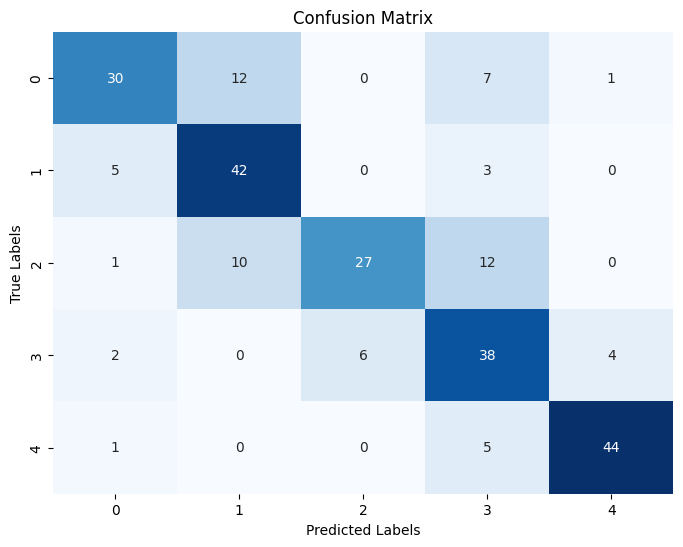

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [11]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.60      0.67        50
           1       0.66      0.84      0.74        50
           2       0.82      0.54      0.65        50
           3       0.58      0.76      0.66        50
           4       0.90      0.88      0.89        50

    accuracy                           0.72       250
   macro avg       0.75      0.72      0.72       250
weighted avg       0.75      0.72      0.72       250

